In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from string import punctuation
import re
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
dataset = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [3]:
dataset.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
dataset.Rating.describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

#### Ratings are from 1 to 5

In [5]:
stoppers =stopwords.words('english')+list(punctuation)

In [6]:
s_stemmer =  WordNetLemmatizer()

In [7]:
def clean_txt(sent):
    sent = sent.strip()
    result = re.sub("\s", " ",sent)
    result1 = re.sub("[^\w\s]","",result)
    tokens =word_tokenize(result1.lower())
    stemmed = [s_stemmer.lemmatize(term) for term in tokens \
              if term not in stoppers and \
              len(term) > 2 ]
    res = ' '.join(stemmed)
    return res

In [8]:
data = list(dataset.Review.apply(clean_txt))

In [9]:
cleaned_data = pd.DataFrame(data = data,columns=['clean_reviews'])

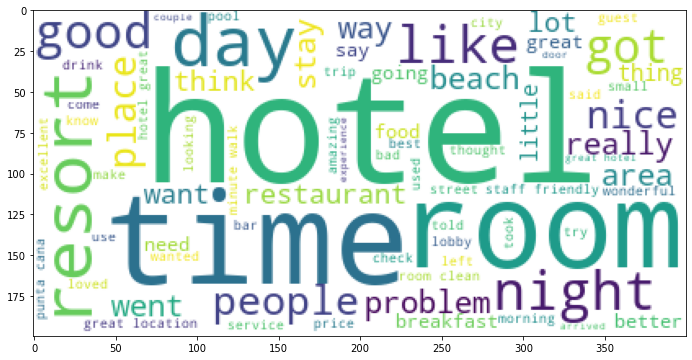

In [10]:
# wordcloud on the most occuring words in the reviews
plt.figure(figsize=(15,6))
word_cloud = ' '.join(cleaned_data.clean_reviews.values)
word_cloud = WordCloud(max_words=150,min_font_size=6,background_color='white',random_state=5,
                       stopwords=stoppers).generate(word_cloud)
plt.imshow(word_cloud)

In [11]:
sia = SentimentIntensityAnalyzer()
cv = CountVectorizer(max_features=2500)

In [12]:
def clean_txt_new(sent):
    sent = sent.strip()
    result = re.sub("\s", " ",sent)
    result1 = re.sub("[^\w\s]","",result)
    tokens =word_tokenize(result1.lower())
    token_new = [(term) for term in tokens \
              if term not in stoppers and \
              len(term) > 2 ]
    res = ' '.join(token_new)
    return res

In [13]:
cleaned_data['clean_review_unstemmed'] = dataset.Review.apply(clean_txt_new)

In [14]:
def get_vader_sentiment(sent):
    return sia.polarity_scores(sent)['compound']

In [15]:
cleaned_data['vader_score'] = dataset.Review.apply(get_vader_sentiment)

In [16]:
cleaned_data

,clean_reviews,clean_review_unstemmed,vader_score
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.9747
1,nothing special charge diamond member hilton d...,nothing special charge diamond member hilton d...,0.9787
2,nice room experience hotel monaco seattle good...,nice rooms experience hotel monaco seattle goo...,0.9889
3,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.9912
4,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,0.9797
...,...,...,...
20486,best kept secret 3rd time staying charm 5star ...,best kept secret 3rd time staying charm 5star ...,0.9834
20487,great location price view hotel great quick pl...,great location price view hotel great quick pl...,0.9753
20488,look nice modern outside desk staff particular...,looks nice modern outside desk staff particula...,0.2629
20489,hotel theft ruined vacation hotel opened sept ...,hotel theft ruined vacation hotel opened sept ...,0.9867


In [46]:
def test(sent):
    if sent > 0.3:
        return 1
    elif sent < -0.2:
        return -1
    else:
        return 0

In [47]:
cleaned_data['vader_score_predict'] = cleaned_data.vader_score.apply(test)

In [48]:
dataset['Vader_Scores'] = cleaned_data['vader_score_predict']

### Positive ratings with overall positive reviews

In [50]:
pd.set_option("display.max_colwidth",600)
dataset[dataset['Vader_Scores'] == 1][['Rating','Review']].head(10)

,Rating,Review
0,4,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,"
1,2,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished h..."
2,3,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car serv..."
3,5,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathrobes feel like rock stars, nice did n't look like sterile chain hotel hotel personality excellent sta..."
4,5,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language face priceless, ass told, said large city, told head doorman issue called cab company promply answer did n't, apologized offered pay taxi, bucks 2 miles stadium, game plan taxi return going humpin, gr..."
5,5,"love monaco staff husband stayed hotel crazy weekend attending memorial service best friend husband celebrating 12th wedding anniversary, talk mixed emotions, booked suite hotel monte carlos, loaned beautiful fan-tanned goldfish named joliet weekend visited dogs worked desk human companions, room decorated nicely couch used pillows, l'occitane bath amenities welcome sight, room quiet peaceful, wireless internet access wonderful server went morning leaving problems printing boarding passes, afternoon reception serves oenophile-satisfying wine australia scrumptious cookies, restaurant closed..."
6,5,"cozy stay rainy city, husband spent 7 nights monaco early january 2008. business trip chance come ride.we booked monte carlo suite proved comfortable longish stay, room 905 located street building, street noise not problem view interesting rooms building look dank alley midsection large office building, suite comfortable plenty room spread, bathroom 

### Negitive ratings with negitive reviews

In [52]:
pd.set_option("display.max_colwidth",600)
dataset[dataset['Vader_Scores'] == -1][['Rating','Review']].head(10)

,Rating,Review
27,3,"met expectations centrally located hotel blocks water popular nightlife shopping options belltown downtown, classify property star location, paid wedding rate not sure fares value proposition, room spacious little outdated, rooms decent views lower floor drab panaroma parking lot buildings, adequate fitness center sauna pool basement quaint bar/restaurant attached hotel, parking 30 day outrage possibly standard downtown street parking weekend save dollars, willing stay future price significantly lower nearby four-star competition,"
40,1,"bad choice, booked hotel hot wire called immediately requesting nonsmoking room king bed room away elevator/ice.the person spoke pleasant stated not guarantee requests honored make note reservation, check-in person desk rude said no special request noted reservation card andstated no king beds way reservation stuck 2 double beds, located directly accross elevator ice, nonsmoking, no elevator parking garage hotel, warwick mats garage filthy stairwells, hotel faces 4th smells urine, carpets registration elevator area need cleaning, upholstery curtains room needed cleaning andpressing sign ba..."
42,2,"warwick bad good reviews warwick shocks staff quite rude rooms fairly dirty, cut asked bandaid did not, requested bottle opener did not better service,"
65,1,"hated inn terrible, room-service horrible staff un-welcoming, decor recently updated lacks complete look, managment staff horrible,"
71,2,"disappointed arranging anticipated girl weekend friend escape children excited sleeping night, children want enjoy hip places cool design stay boring run-of-the hotel opted ace hotel digs, order ensure maximum uninterrupted sleep booked separate rooms, arrival hotel informed hotel mix-up online reservation room small queen-sized bed supposedly deluxe room, normally suck accept just simple mistake time really annoyed, irritation partially attributed overall nonchalant attitude uber-cool reception person did n't really attempt compensate slightly lower rate room, fact checked reservation pri..."
76,1,"stay clear, internet reservation friday rang hour later add thursday booking, thursday rang let know arriving late said no problem, arrive 10.30pm hear oh n't booking tonight, n't room, total apathy not concerned, says sorrys looks reservation book sorrys apathy, finally says bb door calls authority hangs says sorry times, incompetence management employees, completely soured trip, stay away,"
77,1,"single rooms like hospital rooms single rooms hotel sparse intentional know ugly like trapped hospital white walls sink basin room small rectangle shape.the beds hard rocks blankets rough really noisy.this overrated hotel stayed fan stype hotels,"
79,2,"seattle crown plaza not worth money got late hotel 1230pm gave away reservation king sized bed travel/business days booked hotel, girl reception desk asked b/c late blamed day shift giving away room 4pm, thing said nothing proceded offer breakfast change room morning, rude not make good eye contact ask manager, did n't manager morning, days people helpful pleasant deal, hotel accomodations, old need lot renovations, example wallpaper bathroom peeling, got king bedroom gave corner room probably inconvenience, furniture did not fit room, tv small dressers small, tried use safe room broken, i..."
88,1,"worst hotel experience booked nonsmoking room online weeks advance stay crowne plaza downtown seattle, arrival desk staff asked consider smoking room, completely unacceptable family clearly stated no not consider smoking room mainly concern infant daughter health, particular staff member went speak quietly desk staff member agreed particular room, entered room smell cigarette smoke apparent not imagine desk staff intentionally smoking room informing, days later discovered ashtray matches checked desk discover fact smoking room intentionally not kept reserved nonsmoking room, clothes belong..."
99,1,"old dumpy place problems head starts spinning thinkin

### Lets Try assuming what the ratings will be based on the vader scores

In [69]:
def new_test(sent):
    if sent < -0.8:
        return 1
    elif sent > -0.8 and  sent < -0.2:
        return 2
    elif sent > -0.2 and sent < 0.2:
        return 3
    elif sent > 0.2 and sent < 0.8:
        return 4
    elif sent > 0.8:
        return 5

In [71]:
assumed_rating = pd.DataFrame(cleaned_data.vader_score.apply(new_test))
assumed_rating['actual_ratings'] = dataset.Rating

In [73]:
assumed_rating.index = range(1,len(assumed_rating)+1)

In [74]:
assumed_rating

,vader_score,actual_ratings
1,5.0,4
2,5.0,2
3,5.0,3
4,5.0,5
5,5.0,5
...,...,...
20487,5.0,5
20488,5.0,4
20489,4.0,2
20490,5.0,1
